**Importing the libraries**

In [1]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.model_selection import GridSearchCV

import scipy.signal
import pandas as pd
from scipy.signal import find_peaks

import numpy as np

In [2]:
final_df1 = pd.read_csv('D:\PIP\Data\Processed Data\model_1_data.csv' , index_col=[0])

In [9]:
elimination_df = pd.read_csv('D:\PIP\Data\Processed Data\model_2_data.csv' , index_col=[0] )

In [11]:
nonelimination_df = pd.read_csv('nonelimination_df.csv' , index_col=[0] )

In [12]:
elimination_df

Event_ID   mean_of_sum  \
0      RXZlbnRJbmZvcm1hdGlvbjo0M2E2Mjk2My1jNzRiLTRjZT...  12953.328304   
1      RXZlbnRJbmZvcm1hdGlvbjo0M2EwZGNjNi0zOWQzLTQ4YW...  11779.293054   
3      RXZlbnRJbmZvcm1hdGlvbjo0M2FhOGNiNC0yMDIwLTQzYj...  12382.194310   
4      RXZlbnRJbmZvcm1hdGlvbjo0M2FiZmQzNC02Yzc5LTQ0ZD...  10253.044944   
6      RXZlbnRJbmZvcm1hdGlvbjo0M2I3YmMwNC1jOTg1LTQxZm...   9879.498821   
...                                                  ...           ...   
13064  RXZlbnRJbmZvcm1hdGlvbjpmZmUzMTRlMi1iZjFmLTQ2Zj...   9329.648661   
13065  RXZlbnRJbmZvcm1hdGlvbjpmZmViZDA1MC1lNGZmLTQ4YW...   9630.566740   
13068  RXZlbnRJbmZvcm1hdGlvbjpmZmY1NGU1Mi02OGEzLTQ3Yz...  17223.440780   
13072  RXZlbnRJbmZvcm1hdGlvbjpmZmYzZTVkNy05MWQwLTQyM2...  14834.655341   
13074  RXZlbnRJbmZvcm1hdGlvbjpmZmZkOTEwNS04YjkyLTQ0Mm...   7329.183955   

       min_of_sum  max_of_sum  median_of_sum  variance_of_sum  activity_time  \
0            8867       13753        13084.0     3.078636e+05      54.848858   
1            9140       15408        12192.5     6.668127e+06      87.074933   
3            8455       14373        13796.0     4.029148e+06      77.299939   
4            4009       11251        10261.0     8.913158e+04     131.249930   
6            4480       10805        10161.0     1.237984e+06      42.374946   
...           ...         ...            ...              ...            ...   
13064        4239       10190         9495.0     4.982256e+05     105.517992   
13065        5907       10638         9673.0     1.288518e+05     124.149936   
13068       14197       17786        17281.0     1.088981e+05      87.263535   
13072       10880       15724        14880.0     1.448591e+05      86.799932   
13074        4949        9662         8639.0     3.170973e+06      48.899931   

        std_of_sum    rms_of_sum  crest_factor  ...  PSD_10_to_15Hz_max  \
0       554.854588  12965.201001      1.060763  ...          277.075423   
1      2582.271770  12058.936869      1.277725  ...          745.079177   
3      2007.273781  12543.786561      1.145826  ...          632.264494   
4       298.549124  10257.389786      1.096868  ...         1868.285632   
6      1112.647378   9941.918889      1.086812  ...          970.417586   
...            ...           ...           ...  ...                 ...   
13064   705.850995   9356.305453      1.089105  ...          511.830949   
13065   358.959296   9637.252802      1.103842  ...         1315.726301   
13068   329.997130  17226.600918      1.032473  ...          496.768100   
13072   380.603579  14839.535588      1.059602  ...          894.263334   
13074  1780.722609   7542.300056      1.281042  ...          344.697514   

       PSD_10_to_15Hz_min  PSD_10_to_15Hz_median  PSD_15_to_20Hz_max  \
0                0.119217              32.478283          204.028872   
1                0.037157              54.106007          388.245702   
3               26.652634             169.014655          297.458833   
4                1.428936             287.261296        14078.380184   
6                0.008250             205.845153         2005.279222   
...                   ...                    ...                 ...   
13064            0.386475              86.298279          245.543087   
13065            0.122677              98.431538          359.140583   
13068            0.137611              40.724437          257.684676   
13072            0.450100              97.905959          399.636297   
13074            0.825435              26.083872           98.443520   

       PSD_15_to_20Hz_min  PSD_15_to_20Hz_median  Label      Cat_Name  \
0                0.035448              15.737586      1  Cracker Jack   
1                0.051919              34.697678      1       Cartman   
3               34.131529             126.747354      1         Vinny   
4                0.172929             215.570018      0          Lexi   
6                0.215967             164.841589      0       Greml

In [13]:
## in final_df1 , for 'Label E/NE' column , 1 is elimination and 0 is non-elimination ##

In [14]:
## in elimination_df , for 'Label' column , 1 is urination and 0 is defecation ##

**Explore the support and time duration of activities**

<AxesSubplot:xlabel='Label E/NE', ylabel='activity_time'>

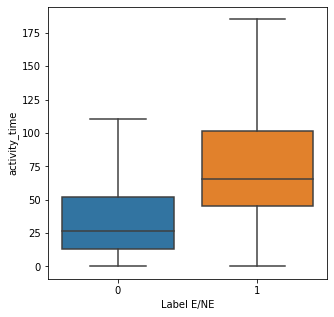

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['activity_time'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='activity_time'>

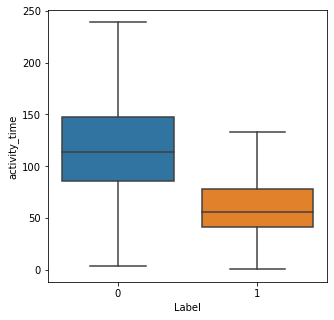

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['activity_time'], showfliers=False)

**How do the statistical measures (e.g., mean load value, variance etc.) of load sensor data differ for each activity?**

<AxesSubplot:xlabel='Label E/NE', ylabel='mean_of_sum'>

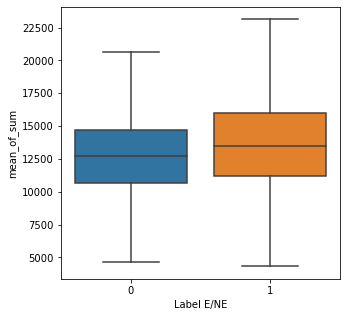

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['mean_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='mean_of_sum'>

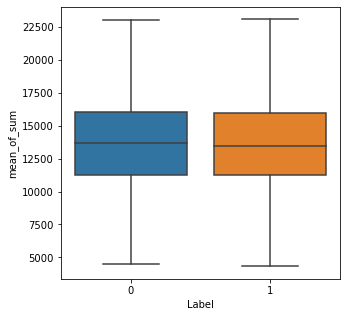

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['mean_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='min_of_sum'>

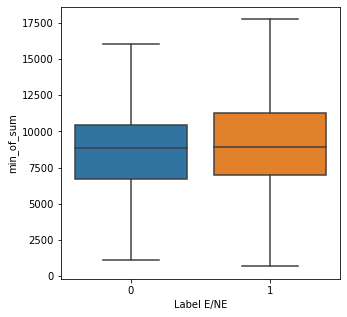

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['min_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='min_of_sum'>

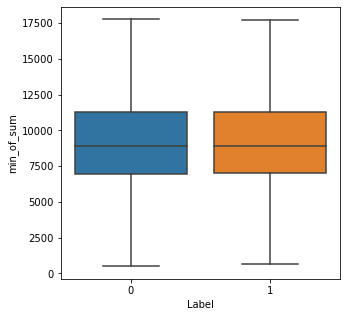

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['min_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='max_of_sum'>

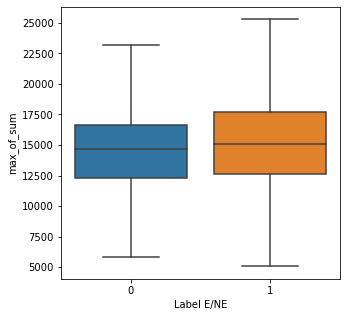

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['max_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='max_of_sum'>

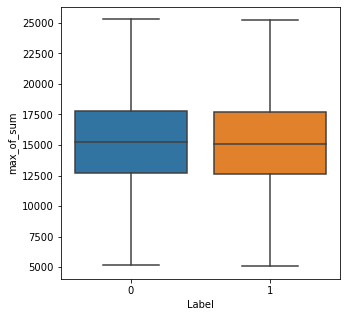

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['max_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='Range_of_sum'>

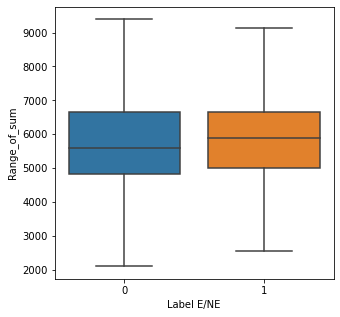

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['Range_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='Range_of_sum'>

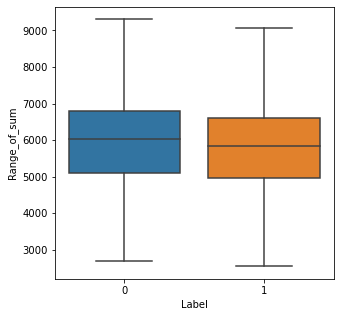

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['Range_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='median_of_sum'>

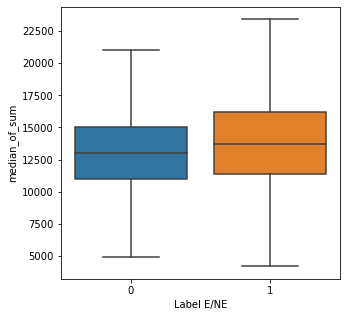

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['median_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='median_of_sum'>

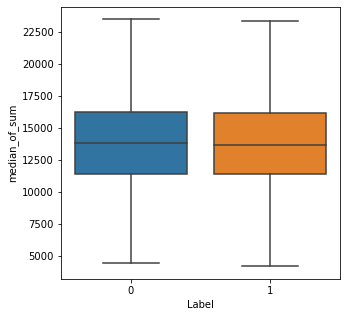

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['median_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='variance_of_sum'>

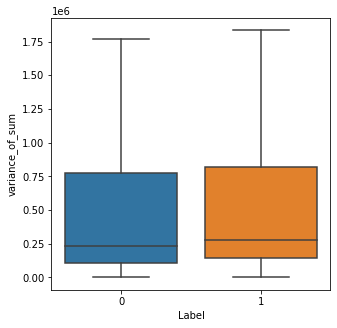

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='rms_of_sum'>

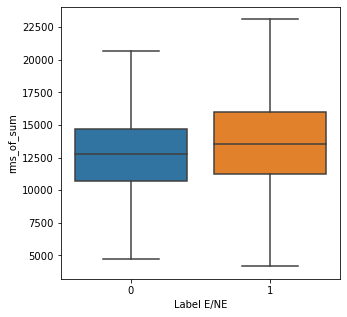

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['rms_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='rms_of_sum'>

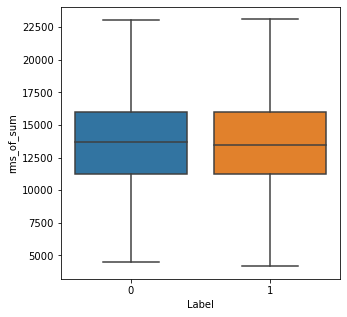

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['rms_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='crest_factor'>

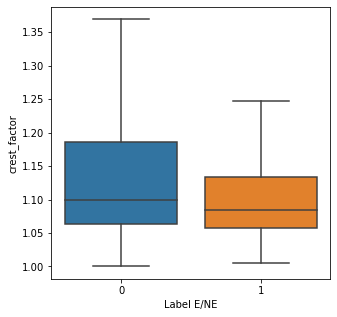

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['crest_factor'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='crest_factor'>

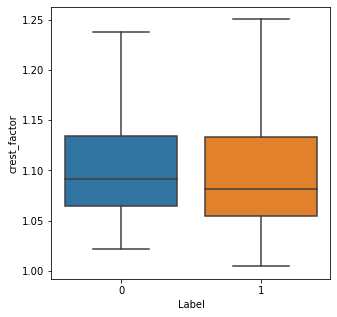

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['crest_factor'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='variance_of_sum'>

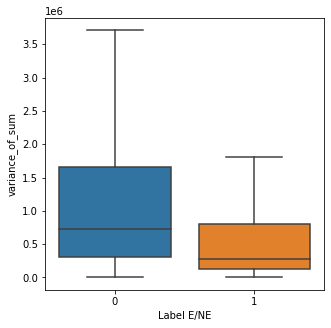

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='std_of_sum'>

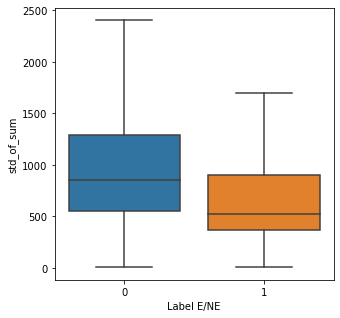

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['std_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='std_of_sum'>

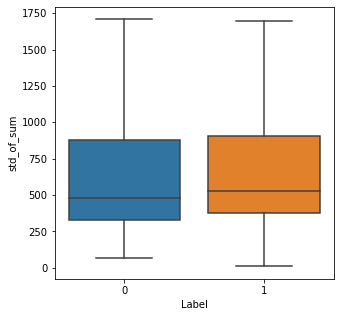

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['std_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='no_of_peaks'>

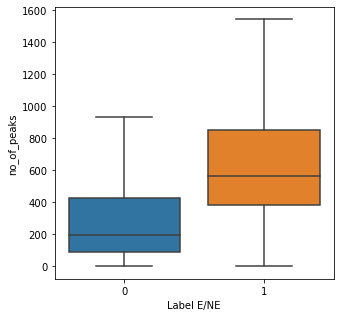

In [34]:
#analysis of number of peaks for elimination and non-elimination

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['no_of_peaks'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='no_of_peaks'>

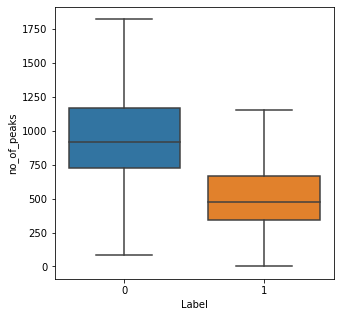

In [35]:
#analysis of number of peaks for urination and defecation

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['no_of_peaks'], showfliers=False)

In [36]:
final_df1.columns

Index(['Event_ID', 'mean_of_sum', 'min_of_sum', 'max_of_sum', 'median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'rms_of_sum',
       'crest_factor', 'no_of_peaks', 'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min',
       'PSD_0_to_5Hz_median', 'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min',
       'PSD_5_to_10Hz_median', 'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min',
       'PSD_10_to_15Hz_median', 'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min',
       'PSD_15_to_20Hz_median', 'Label', 'Cat_Name', 'Label E/NE',
       'Range_of_sum'],
      dtype='object')

In [37]:
# Analysis of Power spectral density for 0-5Hz

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_0_to_5Hz_max'>

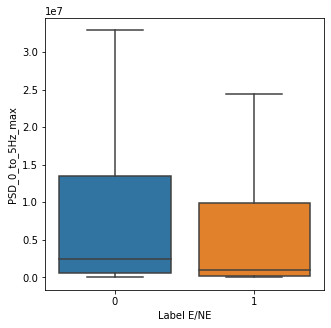

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_0_to_5Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_0_to_5Hz_max'>

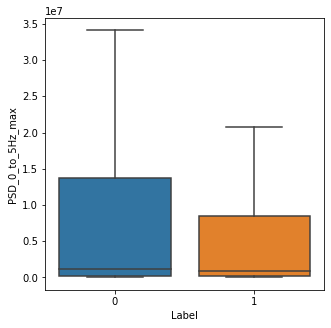

In [39]:

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_0_to_5Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_0_to_5Hz_min'>

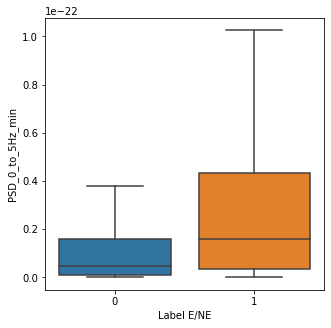

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_0_to_5Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_0_to_5Hz_min'>

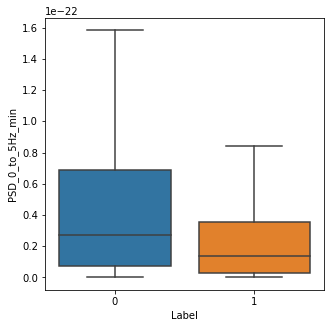

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_0_to_5Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_0_to_5Hz_median'>

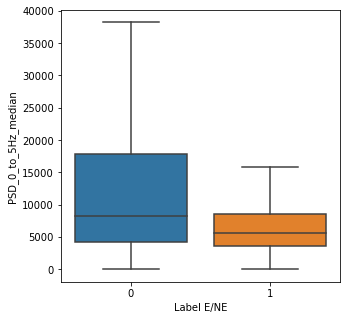

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_0_to_5Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_0_to_5Hz_median'>

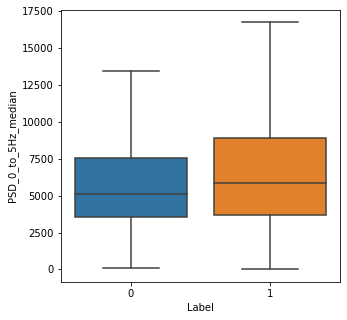

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_0_to_5Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_5_to_10Hz_max'>

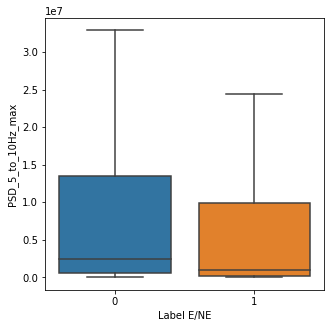

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_5_to_10Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_5_to_10Hz_max'>

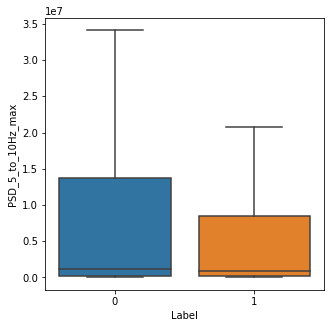

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_5_to_10Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_5_to_10Hz_min'>

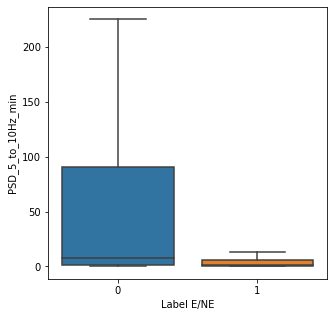

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_5_to_10Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_5_to_10Hz_min'>

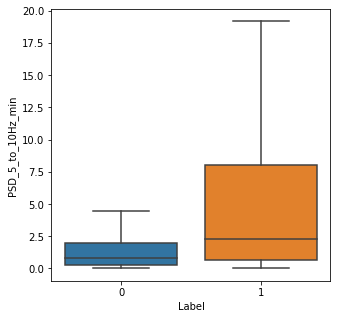

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_5_to_10Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_5_to_10Hz_median'>

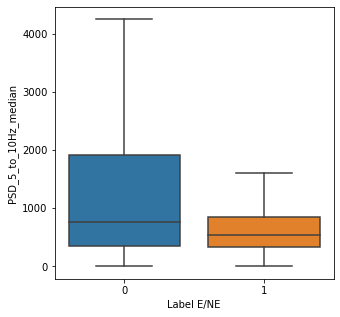

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_5_to_10Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_5_to_10Hz_median'>

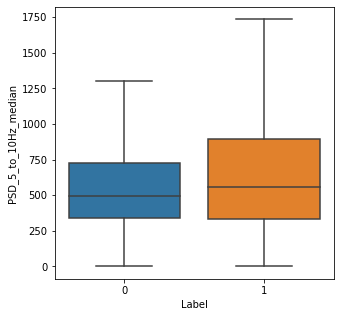

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_5_to_10Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_10_to_15Hz_max'>

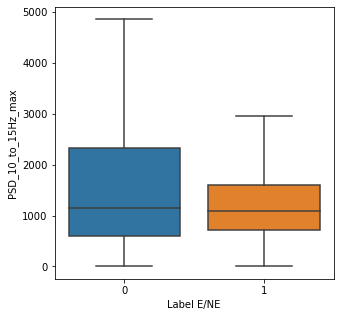

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_10_to_15Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_10_to_15Hz_max'>

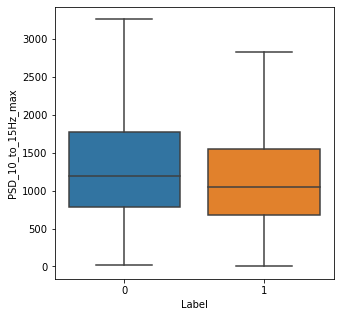

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_10_to_15Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_10_to_15Hz_min'>

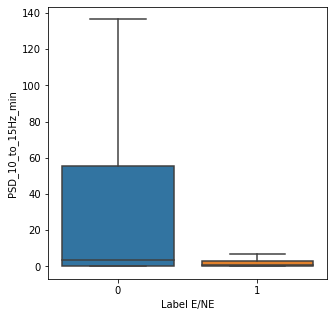

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_10_to_15Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_5_to_10Hz_min'>

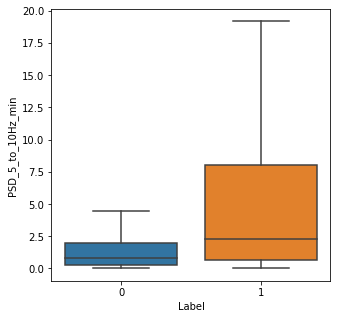

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_5_to_10Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_10_to_15Hz_median'>

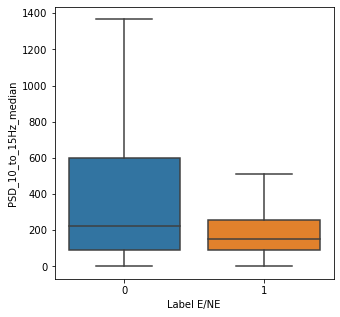

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_10_to_15Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_10_to_15Hz_median'>

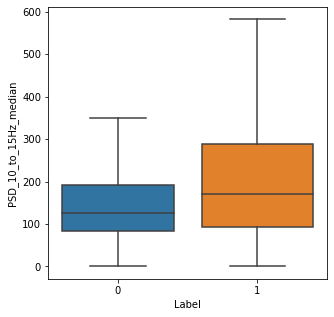

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_10_to_15Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_15_to_20Hz_max'>

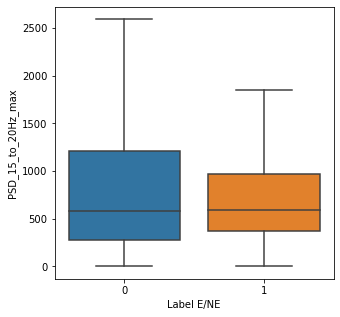

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_15_to_20Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_15_to_20Hz_max'>

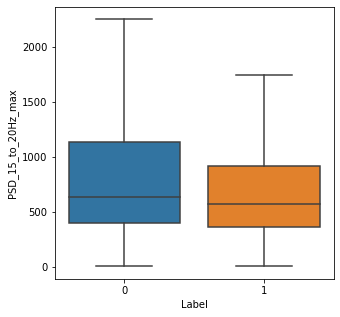

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_15_to_20Hz_max'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_15_to_20Hz_min'>

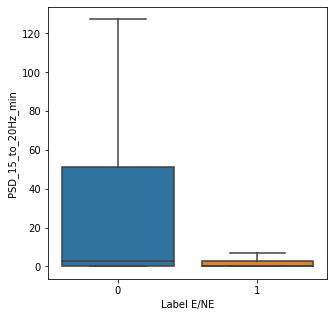

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_15_to_20Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_15_to_20Hz_min'>

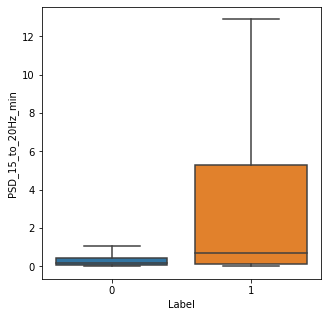

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_15_to_20Hz_min'], showfliers=False)

<AxesSubplot:xlabel='Label E/NE', ylabel='PSD_15_to_20Hz_median'>

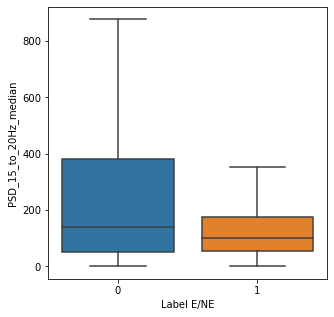

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= final_df1['Label E/NE'], y = final_df1['PSD_15_to_20Hz_median'], showfliers=False)

<AxesSubplot:xlabel='Label', ylabel='PSD_15_to_20Hz_median'>

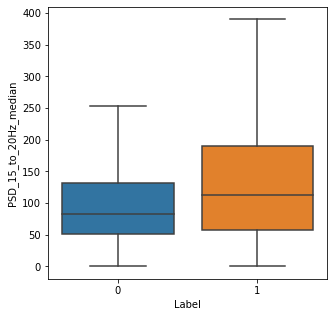

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['PSD_15_to_20Hz_median'], showfliers=False)

In [62]:
## Creating a dataframe with Event_ID and Weight of the cat for analysis at cat level ##

In [63]:

path_1 = 'D:\Raw_data (2)\Raw_data'
subfolder_list = os.listdir(path_1)
subfolder_list

master_df_catwieght = []
for x in subfolder_list:
    path = 'D:\Raw_data (2)\Raw_data' + '\\' + x
    json_files = glob.glob(os.path.join(path,'*.json'))
   
    for f in json_files:
        with open(f) as json_file:
            data = json.load(json_file)
            Event_ID = data['Event_ID']
            Weight_of_cat = data['Weight_of_cat']
            dict_ = {'Event_ID':Event_ID , 'Weight_of_cat': Weight_of_cat}
            df  = pd.DataFrame(dict_ ,index = [0])
            master_df_catwieght.append(df)
                                
master_df_catwieght = pd.concat(master_df_catwieght).reset_index(drop= True)

In [64]:
finaldf1_withCatweight = pd.merge(final_df1, master_df_catwieght , on = 'Event_ID', how = 'inner')

In [65]:
eliminationdf_withCatWeight = pd.merge(elimination_df, master_df_catwieght , on = 'Event_ID', how = 'inner')

In [66]:
finaldf1_withCatweight.head(2)

Event_ID   mean_of_sum  \
0  RXZlbnRJbmZvcm1hdGlvbjo0M2E2Mjk2My1jNzRiLTRjZT...  12953.328304   
1  RXZlbnRJbmZvcm1hdGlvbjo0M2EwZGNjNi0zOWQzLTQ4YW...  11779.293054   

   min_of_sum  max_of_sum  median_of_sum  variance_of_sum  activity_time  \
0        8867       13753        13084.0     3.078636e+05      54.848858   
1        9140       15408        12192.5     6.668127e+06      87.074933   

    std_of_sum    rms_of_sum  crest_factor  ...  PSD_10_to_15Hz_min  \
0   554.854588  12965.201001      1.060763  ...            0.119217   
1  2582.271770  12058.936869      1.277725  ...            0.037157   

   PSD_10_to_15Hz_median  PSD_15_to_20Hz_max  PSD_15_to_20Hz_min  \
0              32.478283          204.028872            0.035448   
1              54.106007          388.245702            0.051919   

   PSD_15_to_20Hz_median      Label      Cat_Name  Label E/NE  Range_of_sum  \
0              15.737586  urination  Cracker Jack           1          4886   
1              34.697678  urination       Cartman           1          6268   

   Weight_of_cat  
0           4192  
1           5195  

[2 rows x 28 columns]

In [67]:
eliminationdf_withCatWeight.head(2)

Event_ID   mean_of_sum  \
0  RXZlbnRJbmZvcm1hdGlvbjo0M2E2Mjk2My1jNzRiLTRjZT...  12953.328304   
1  RXZlbnRJbmZvcm1hdGlvbjo0M2EwZGNjNi0zOWQzLTQ4YW...  11779.293054   

   min_of_sum  max_of_sum  median_of_sum  variance_of_sum  activity_time  \
0        8867       13753        13084.0     3.078636e+05      54.848858   
1        9140       15408        12192.5     6.668127e+06      87.074933   

    std_of_sum    rms_of_sum  crest_factor  ...  PSD_10_to_15Hz_min  \
0   554.854588  12965.201001      1.060763  ...            0.119217   
1  2582.271770  12058.936869      1.277725  ...            0.037157   

   PSD_10_to_15Hz_median  PSD_15_to_20Hz_max  PSD_15_to_20Hz_min  \
0              32.478283          204.028872            0.035448   
1              54.106007          388.245702            0.051919   

   PSD_15_to_20Hz_median  Label      Cat_Name  Label E/NE  Range_of_sum  \
0              15.737586      1  Cracker Jack           1          4886   
1              34.697678      1       Cartman           1          6268   

   Weight_of_cat  
0           4192  
1           5195  

[2 rows x 28 columns]

<AxesSubplot:xlabel='Label', ylabel='activity_time'>

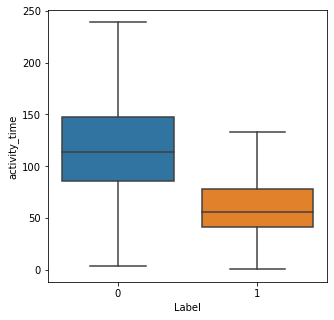

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= elimination_df['Label'], y = elimination_df['activity_time'], showfliers=False)

In [69]:
# Analysing the different features at individual cat level

<AxesSubplot:xlabel='Cat_Name', ylabel='activity_time'>

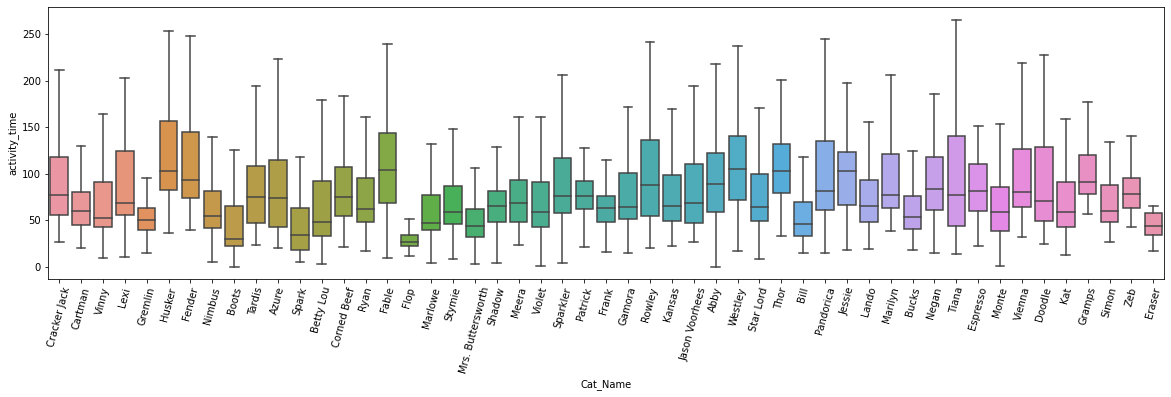

In [70]:
# Elimination(urination and defecation) activity_time for all the cats 

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df['Cat_Name'], y = elimination_df['activity_time'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='activity_time'>

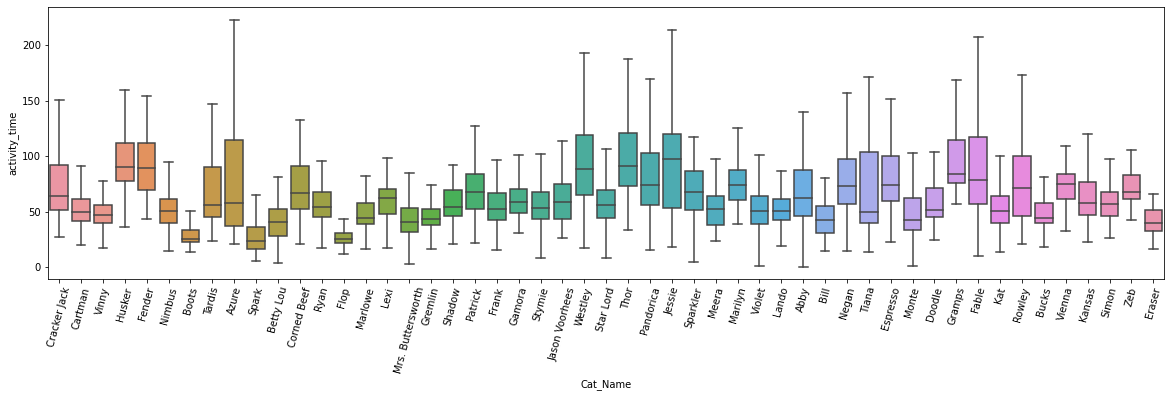

In [73]:
# urination activity_time for all the cats

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df[elimination_df['Label'] == 1]['Cat_Name'], y = elimination_df[elimination_df['Label'] == 1]['activity_time'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='activity_time'>

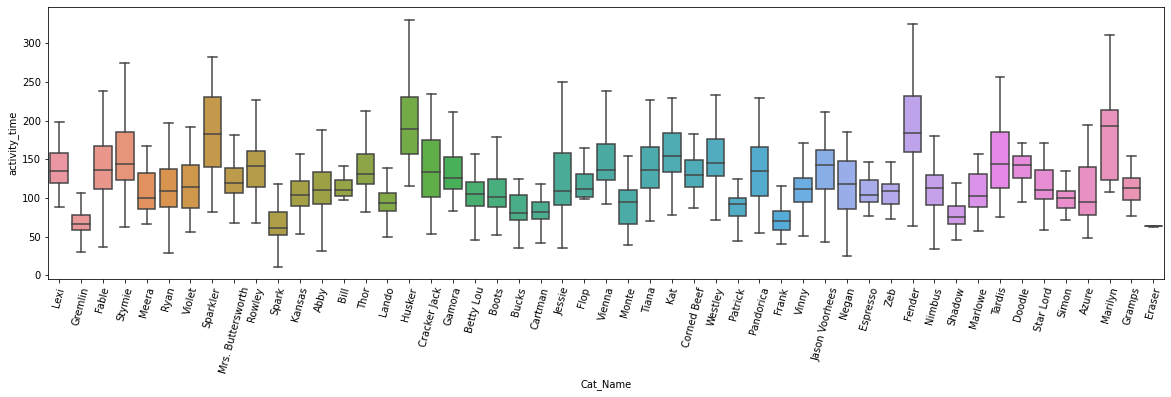

In [75]:
# defecation activity_time for all the cats

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df[elimination_df['Label'] == 0]['Cat_Name'], 
            y = elimination_df[elimination_df['Label'] == 0]['activity_time'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='activity_time'>

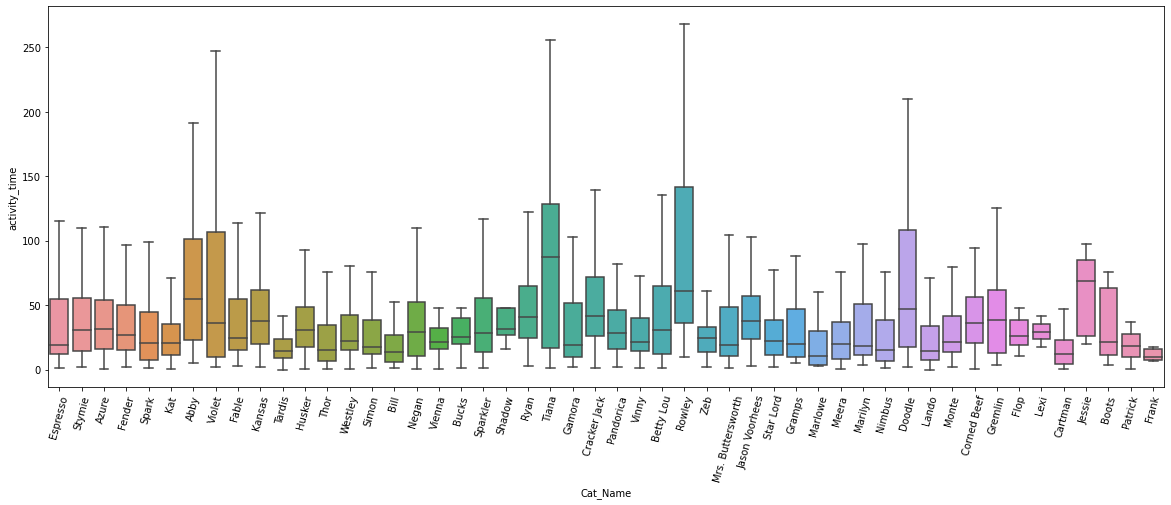

In [78]:
# Non-Elimination activity_time for all the cats 

fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation = 75)
sns.boxplot(x= nonelimination_df['Cat_Name'], y = nonelimination_df['activity_time'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='variance_of_sum'>

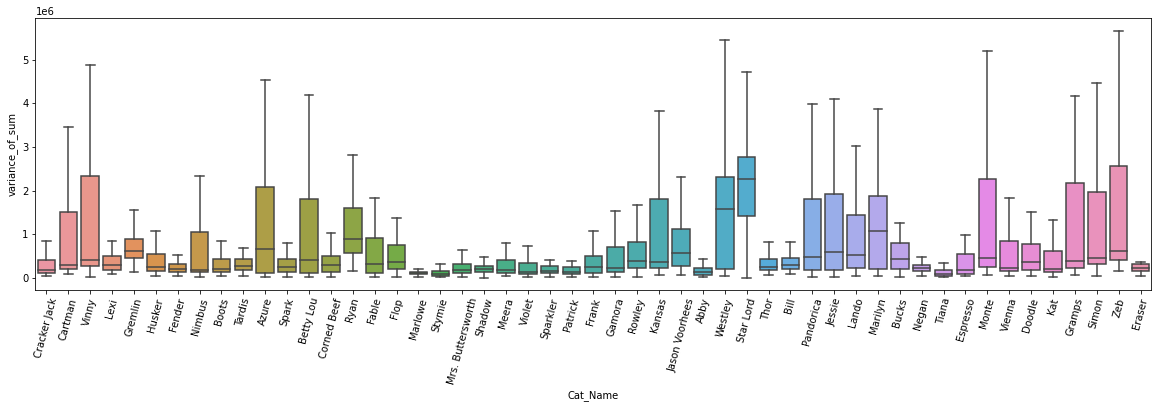

In [79]:
# Elimination(urination and defecation) variance_of_sum for all the cats 

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df['Cat_Name'], y = elimination_df['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='variance_of_sum'>

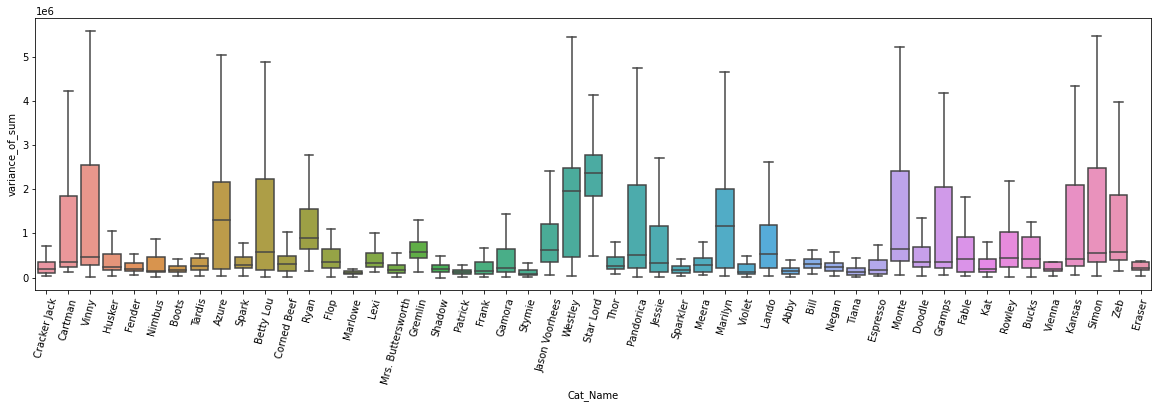

In [81]:
# urination variance_of_sum for all the cats

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df[elimination_df['Label'] == 1]['Cat_Name'],
            y = elimination_df[elimination_df['Label'] == 1]['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='variance_of_sum'>

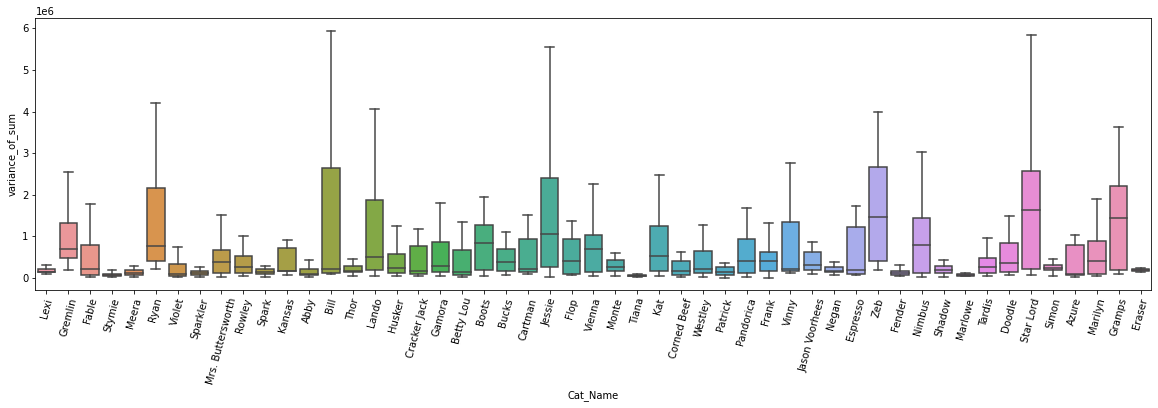

In [82]:
# defecation variance_of_sum for all the cats

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation = 75)
sns.boxplot(x= elimination_df[elimination_df['Label'] == 0]['Cat_Name'], 
            y = elimination_df[elimination_df['Label'] == 0]['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='Cat_Name', ylabel='variance_of_sum'>

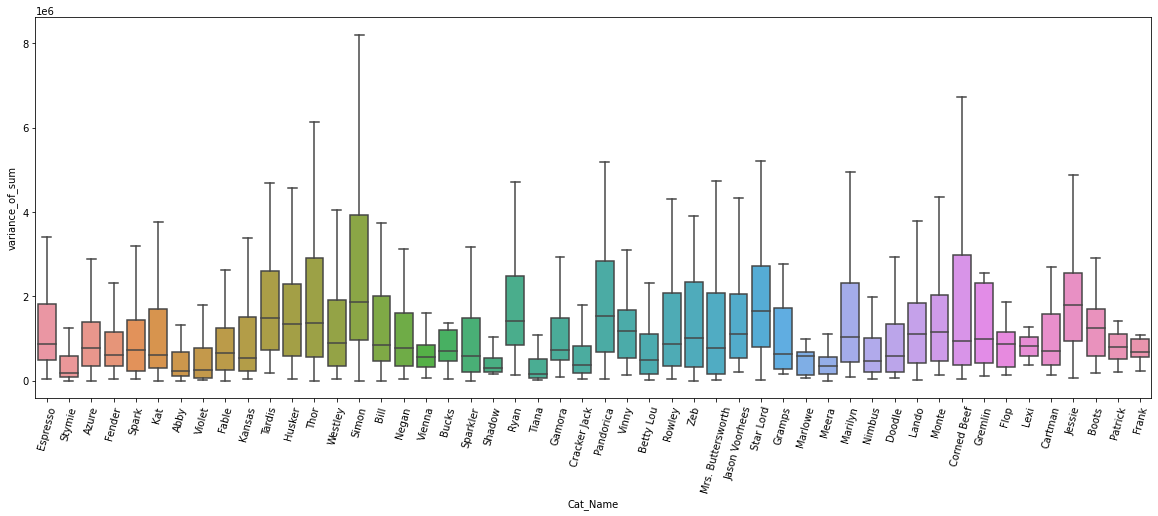

In [83]:
# Non-Elimination variance_of_sum for all the cats 

fig, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation = 75)
sns.boxplot(x= nonelimination_df['Cat_Name'], y = nonelimination_df['variance_of_sum'], showfliers=False)